In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Kaggle API
import os
os.environ['KAGGLE_USERNAME'] = 'kambleabhijeet'
os.environ['KAGGLE_KEY'] = 'ea830af5f56bdcefde51c1f9b34db965'

In [3]:
# Downloading the dataset directly from Kaggle on the Colab environment 
!kaggle datasets download -d josephassaker/covid19-global-dataset

covid19-global-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Unzipping the dataset
! unzip /content/covid19-global-dataset.zip

Archive:  /content/covid19-global-dataset.zip
replace worldometer_coronavirus_daily_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
from datetime import datetime, timedelta
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

In [6]:
# Load the daily dataset
df= pd.read_csv('/content/worldometer_coronavirus_daily_data.csv',parse_dates=['date'], date_parser=dateparse)
df.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-02-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-02-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-02-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-02-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-02-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [7]:
# Load the summary dataset
df_summary = pd.read_csv('/content/worldometer_coronavirus_summary_data.csv')
df_summary.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,147473,6736.0,98073.0,42664.0,1124.0,3699,169.0,707244.0,17739.0,39869084
1,Albania,Europe,133081,2457.0,130222.0,402.0,3.0,46299,855.0,916777.0,318945.0,2874408
2,Algeria,Africa,171392,4254.0,115276.0,51862.0,47.0,3834,95.0,230861.0,5164.0,44701619
3,Andorra,Europe,14678,128.0,14210.0,340.0,NaN,189643,1654.0,193595.0,2501292.0,77398
4,Angola,Africa,42646,1008.0,36708.0,4930.0,8.0,1256,30.0,681443.0,20065.0,33961015


In [8]:
# Check dimension of dataset
r,c = df.shape
print(f'No. of rows: {r}')
print(f'No. of columns: {c}')

No. of rows: 117064
No. of columns: 7


In [9]:
# Check the missing value
print(df.isnull().sum())
print(f'\nTotal missing values present in the dataset: {df.isnull().values.sum()}')

date                           0
country                        0
cumulative_total_cases         0
daily_new_cases             6873
active_cases                 532
cumulative_total_deaths     6916
daily_new_deaths           20843
dtype: int64

Total missing values present in the dataset: 35164


In [10]:
# Descriptive statistics of the dataset
df.describe()

,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
count,1.170640e+05,110191.000000,1.165320e+05,110148.000000,96221.000000
mean,3.232067e+05,1796.563767,4.285222e+04,8250.967734,43.891895
std,1.855618e+06,10553.141797,3.395986e+05,38418.415852,201.552470
min,0.000000e+00,-322.000000,-1.432100e+04,0.000000,-31.000000
25%,3.230000e+02,0.000000,3.000000e+01,9.000000,0.000000
50%,6.603000e+03,40.000000,8.000000e+02,131.000000,1.000000
75%,8.798600e+04,544.000000,9.288250e+03,1821.000000,12.000000
max,3.568851e+07,414433.000000,9.041162e+06,629064.000000,5015.000000


In [11]:
# Add a 'continent' column to dataset from summary dataset
df['continent'] = df.apply(lambda row: df_summary[df_summary.country == row.country].iloc[0].continent, axis=1)
df

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,continent
0,2020-02-15,Afghanistan,0.0,NaN,0.0,0.0,NaN,Asia
1,2020-02-16,Afghanistan,0.0,NaN,0.0,0.0,NaN,Asia
2,2020-02-17,Afghanistan,0.0,NaN,0.0,0.0,NaN,Asia
3,2020-02-18,Afghanistan,0.0,NaN,0.0,0.0,NaN,Asia
4,2020-02-19,Afghanistan,0.0,NaN,0.0,0.0,NaN,Asia
...,...,...,...,...,...,...,...,...
117059,2021-07-26,Zimbabwe,99944.0,2050.0,28944.0,3173.0,79.0,Africa
117060,2021-07-27,Zimbabwe,101711.0,1767.0,27935.0,3280.0,107.0,Africa
117061,2021-07-28,Zimbabwe,103567.0,1856.0,28844.0,3340.0,60.0,Africa
117062,2021-07-29,Zimbabwe,105656.0,2089.0,28841.0,3421.0,81.0,Africa


# Global Statistics

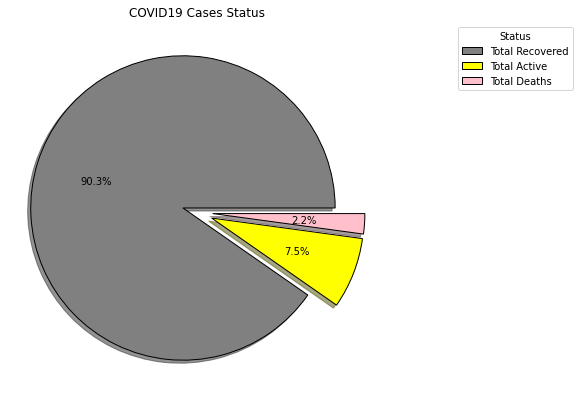

In [12]:
# Data
data=[df_summary.total_recovered.sum(), df_summary.active_cases.sum(), df_summary.total_deaths.sum()]

# Labels
labels=['Total Recovered', 'Total Active', 'Total Deaths']

# Creating color parameters
colors = ( "grey", "yellow", "pink")
  
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('COVID19 Cases Status')
plt.pie(data, 
        labels = None,
        autopct = '%1.1f%%',
        #startangle = 90,
        shadow = True,
        colors = colors,
        explode= (0.1,0.1,0.1),
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True}
        )


# Adding legend
ax.legend(labels,
          title ="Status",
          loc ="best fit",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
# show plot
plt.show()

The above graph shows that the breakdown of all reported cases so far, globally we can observe some very frightening numbers. That out of all cases reported globally 90.3% of cases are recoveries in other hand 7.5% of cases are still active, and rest of the 2.2% of cases ended with death.

In [13]:
import plotly.express as px
import plotly.graph_objs as go

def add_commas(num):
    out = ""
    counter = 0
    for n in num[::-1]:
        counter += 1
        if counter == 4:
            counter = 1
            out = "," + out
        out = n + out
    return out

df_summary['log(Total Confirmed)'] = np.log2(df_summary['total_confirmed'])
df_summary['Total Confirmed'] = df_summary['total_confirmed'].apply(lambda x: add_commas(str(x)))

fig = px.choropleth(df_summary,
                    locations="country",
                    color="log(Total Confirmed)",
                    locationmode = 'country names',
                    hover_name='country',
                    hover_data=['Total Confirmed'],
                    color_continuous_scale='blues',
                    title = '<b>Coronavirus Confirmed Cases Around The Globe</b>')

log_scale_vals = list(range(0,25,2))
scale_vals = (np.exp2(log_scale_vals)).astype(int).astype(str)

scale_vals = list(map(add_commas, scale_vals))

fig.update_layout(title_font_size=22,
                  margin={"r":20, "l":30},
                  coloraxis={#"showscale":False,
                            "colorbar":dict(title="<b>Confirmed Cases</b><br>",
                                            #range=[np.log(50), np.log(6400)],
                                            titleside="top",
                                            tickmode="array",
                                            tickvals=log_scale_vals,
                                            ticktext=scale_vals
                                        )},
                 )

fig.show()

Now, taking a look at the total confirmed COVID-19 cases from all around the world, we can see the spread of the virus in nearly every single country around the world!

To better visualize and compare various countries to each others, the colors in the above map were set based on the log of the total confirmed cases, rather than the raw total confirmed cases numbers. This helps in maintaining a generally good visualization in terms of comparing countries with small number to one another and countries with high large numbers to one another. Notice on the scale the exponential increase of the cases with the intensity of the blue color.

Both North and South America appear to be heavily hit by this pandemic. Europe and Asia are also recording quite high numbers, followed by Africa with slightly less aggressive numbers. Australia/Oceania seems to be the continent fairing the best with this pandemic, with record low numbers